In [1]:
# Get dataset from kaggle: https://www.kaggle.com/ananaymital/us-used-cars-dataset?select=used_cars_data.csv
# Run data cleanning bash script
! ./bash_script.sh

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install -q wordcloud
from wordcloud import WordCloud
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True) # Drop rows containing N/A value
df = df[df.body_type.isin(["SUV / Crossover", "Sedan"])] # Only analyze SUV and Sedan
df['engine_type'] = df['engine_type'].str.extract('(\d+)', expand=False) #Only keep number of cylinder in engine
df['make_name'] = df['make_name'].str.replace(" ","") #Remove space for wordcloud
df.reset_index(drop=True ,inplace=True)
df.head()

,body_type,daysonmarket,engine_type,fleet,frame_damaged,franchise_dealer,fuel_type,has_accidents,horsepower,isCab,is_new,make_name,price,transmission,wheel_system,year
0,Sedan,1233,4,False,False,True,Gasoline,False,305.0,False,False,Subaru,46995.0,M,AWD,2016
1,SUV / Crossover,242,4,False,False,True,Gasoline,False,247.0,False,True,LandRover,66903.0,A,AWD,2020
2,SUV / Crossover,510,4,False,False,True,Gasoline,False,296.0,False,False,LandRover,84399.0,A,AWD,2020
3,Sedan,1233,6,False,False,True,Gasoline,False,320.0,False,False,BMW,58995.0,A,AWD,2016
4,SUV / Crossover,324,4,False,False,True,Gasoline,False,246.0,False,False,LandRover,68899.0,A,AWD,2020


In [4]:
# Fix dtype of columns
numeric_columns = ['daysonmarket', 'price', 'year', 'engine_type']
bool_columns = ['fleet', 'frame_damaged', 'franchise_dealer', 'has_accidents', 'isCab', 'is_new']
df[numeric_columns] = df[numeric_columns].astype(int)
df[bool_columns] = df[bool_columns].astype(bool)

In [5]:
df.dtypes

body_type            object
daysonmarket          int32
engine_type           int32
fleet                  bool
frame_damaged          bool
franchise_dealer       bool
fuel_type            object
has_accidents          bool
horsepower          float64
isCab                  bool
is_new                 bool
make_name            object
price                 int32
transmission         object
wheel_system         object
year                  int32
dtype: object

In [6]:
df.corr() # Correlation table between numeric columns

,daysonmarket,engine_type,fleet,frame_damaged,franchise_dealer,has_accidents,horsepower,isCab,is_new,price,year
daysonmarket,1.000000,0.020708,0.034059,0.041474,-0.109651,0.037924,0.016392,0.009830,0.097140,0.000805,-0.068501
engine_type,0.020708,1.000000,0.000737,-0.013253,-0.075518,0.027273,0.812398,-0.000269,-0.068311,0.321735,-0.234809
fleet,0.034059,0.000737,1.000000,0.038128,-0.110658,-0.003172,-0.044582,0.917755,-0.082159,-0.053624,0.154018
frame_damaged,0.041474,-0.013253,0.038128,1.000000,-0.108073,0.106648,-0.027742,-0.005061,-0.015640,-0.055807,-0.040420
franchise_dealer,-0.109651,-0.075518,-0.110658,-0.108073,1.000000,-0.157246,0.024881,-0.059139,0.111825,0.243744,0.344749
has_accidents,0.037924,0.027273,-0.003172,0.106648,-0.157246,1.000000,-0.033729,-0.027180,-0.067267,-0.166135,-0.213895
horsepower,0.016392,0.812398,-0.044582,-0.027742,0.024881,-0.033729,1.000000,-0.030259,0.022202,0.561002,0.023018
isCab,0.009830,-0.000269,0.917755,-0.005061,-0.059139,-0.027180,-0.030259,1.000000,-0.075486,-0.014493,0.212354
is_new,0.097140,-0.068311,-0.082159,-0.015640,0.111825,-0.067267,0.022202,-0.075486,1.000000,0.181683,0.166356
price,0.000805,0.321735,-0.053624,-0.055807,0.243744,-0.166135,0.561002,-0.014493,0.181683,1.000000,0.486806


# Manufacturers

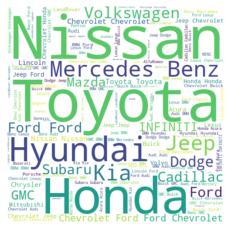

In [7]:
# Manufacturer word cloud
text = ' '.join(df['make_name'])
wc = WordCloud(background_color="white", max_font_size=256, random_state=42, width=500, height=500)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('Manufacturers.png')

# Car attributes

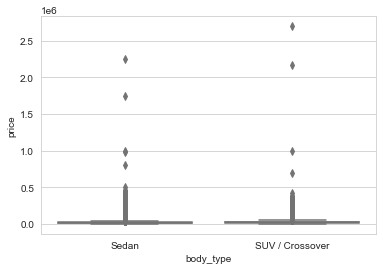

In [8]:
sns.boxplot('body_type', 'price', data=df, palette="pastel")
plt.savefig('attributes/body_type.png')

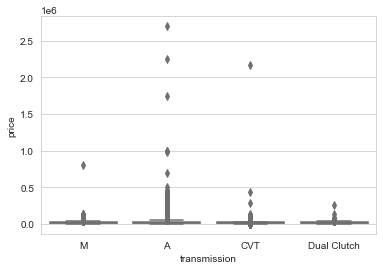

In [9]:
sns.boxplot('transmission', 'price', data=df, palette="pastel")
plt.savefig('attributes/transmission.png')

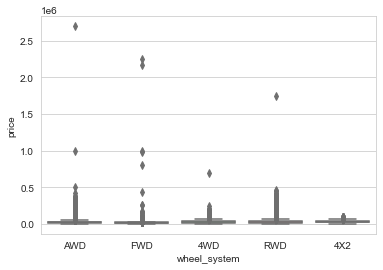

In [10]:
sns.boxplot('wheel_system', 'price', data=df, palette="pastel")
plt.savefig('attributes/wheel_system.png')

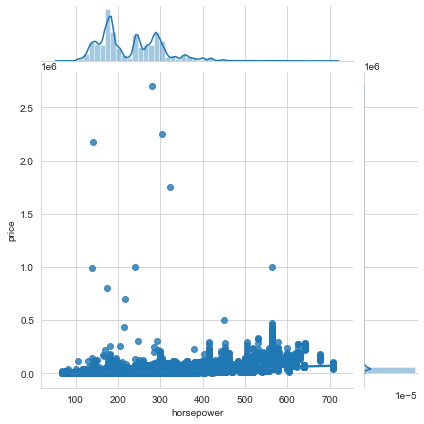

In [11]:
sns.jointplot("horsepower", "price", data=df, kind='reg')
plt.savefig('attributes/horsepower.png')

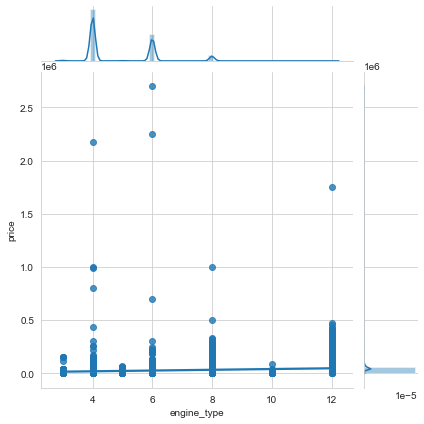

In [12]:
sns.jointplot("engine_type", "price", data=df, kind='reg')
plt.savefig('attributes/engine.png')

# Car conditions

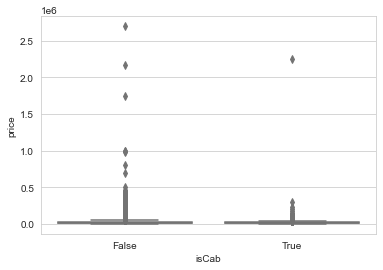

In [13]:
sns.boxplot('isCab', 'price', data=df, palette="pastel")
plt.savefig('conditions/is_cab.png')

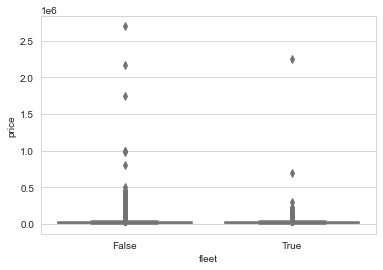

In [14]:
sns.boxplot('fleet', 'price', data=df, palette="pastel")
plt.savefig('conditions/fleet.png')

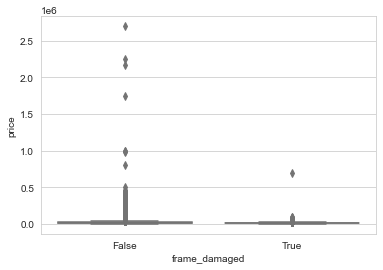

In [15]:
sns.boxplot('frame_damaged', 'price', data=df, palette="pastel")
plt.savefig('conditions/frame_damaged.png')

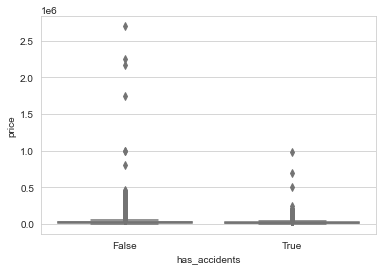

In [16]:
sns.boxplot('has_accidents', 'price', data=df, palette="pastel")
plt.savefig('conditions/has_accidents.png')

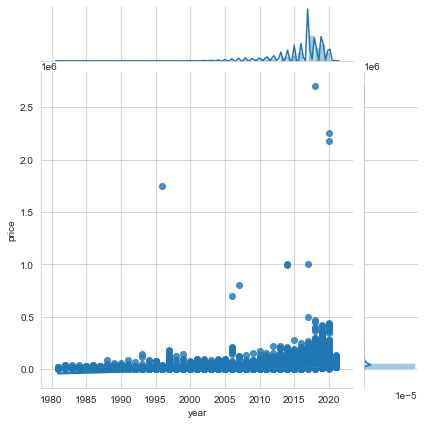

In [17]:
sns.jointplot("year", "price", data=df, kind='reg')
plt.savefig('conditions/year.png')